In [1]:
#
# Monty Hall
#

Three doors (two goats and one car)

1) You pick a door (you don't see what is behind)  

2) Monty Hall opens a door you didn't pick and reveals a goat

3) You need to decide to stay with door 1 or change to other door

Let's assume 

that you have picked door #1

Monty Hall shows you a goat behind door #2

do you stay with door #1 or you switch to door #3


C = where the car really is


At the beggining P(C=1) = P(C=2) = P(C=3) = 1/3

H = door that Monty Hall opens (we assume 2)

P(H=2|C=1) = 0.5 (Monty Hall can open 2 or 3 as car is behind door 1)

P(H=2|C=2) = 0 (Monty Hall can not open door 2 if the car is there)

P(H=2|C=3) = 1 (Monty Hall needs to open door 2 if the car is behind door 3)


We want to know if we should stick to door #1 or switch to door #3

so we want to know P(C=1|H=2) and P(C=3|H=2) 




Bayes Rule

1) P(A|B) = P(A,B) / P(B) 

2) P(B|A) = P(B, A) / P(A)


since P(A, B) = P(B,A) -> P(B|A) = P(A, B) / P(A) -> P(A, B) = P(B|A)*P(A) 

3) P(A|B) = P(B|A)*P(A)/P(B)




P(C=3|H=2)  = P(H=2|C=3) * P(C=3)/P(H=2) =   

P(H=2|C=3) * P(C=3) / [ P(H=2|C=1)P(C=1) + P(H=2|C=2)P(C=2) + P(H=2|C=3)P(C=3) ]  =

1  *  1/3  / [ 1/2 * 1/3  +  0 * 1/3  +  1 * 1/3 ] = 


1/3 / [ 1/6 + 1/3 ] = 1/3  /  [3/6] = 1/3 * 6/3 = 6/9 = 2/3


P(C=1|H=2)  = P(H=2|C=1) * P(C=1)/P(H=2) =   

P(H=2|C=1) * P(C=1) / [ P(H=2|C=1)P(C=1) + P(H=2|C=2)P(C=2) + P(H=2|C=3)P(C=3) ]  =

1/2  *  1/3  / [ 1/2 * 1/3  +  0 * 1/3  +  1 * 1/3 ] = 


1/6 / [ 1/6 + 1/3 ] = 1/6  /  [3/6] = 1/6 * 6/3 = 1/3



In [2]:
#
# We should always switch P(C=3|H=2)= 2/3 (0.6666666666)   and P(C=1|H=2) is only 1/3 (0.3333333333)
#

In [3]:
#
# let's simulate Monty Hall game (based on https://github.com/NickDoesData/monty_hall/blob/master/Monty%20Hall.ipynb)
#

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# np.random.randint(low=1,high=4,size=(1,2))
# assumption: the first value is the originally selected door, the second value is the door which contains the car

In [6]:
def monty_hall():
    #
    #
    [[selected_door, winning_door]] = np.random.randint(low=1,high=4,size=(1,2))
    #print("Selected door = " + str(selected_door))
    #print("Winning door = " + str(winning_door))
    door_options = [1,2,3]
    #
    if selected_door == winning_door:
        #
        # Monty can select from other doors as both remaining doors contain goats.
        #
        door_options.remove(selected_door)
        open_door = np.random.choice(door_options)
        #
        # The door in which a contestant would switch to contains a goat.
        switching_door = door_options.remove(open_door)
    else:
        #  Monty can open only the door containing a goat as a second choice contains a car 
        door_options.remove(selected_door)
        door_options.remove(winning_door)
        open_door = door_options
        #
        switching_door = winning_door
        #
    # A win is indicated with a 1, a loss is indicated with a 0.
    if switching_door == winning_door:
        switch = 1.
        non_switch = 0.
    else:
        switch = 0.
        non_switch = 1.
        #
    return switch, non_switch

In [7]:
def simulate_monty_hall(simulations):
    #
    #
    switching_results = []
    not_switching_results = []
    #
    for x in range(simulations):
        switch, non_switch = monty_hall()
        #
        switching_results.append(switch)
        not_switching_results.append(non_switch)
        #
    return switching_results, not_switching_results

In [8]:
switching_results, not_switching_results = simulate_monty_hall(100)

In [9]:
print('switching case, % of wins = ' + str(sum(switching_results) / len(switching_results)))
print('not switching case, % of wins = ' + str(sum(not_switching_results) / len(not_switching_results)))

switching case, % of wins = 0.69
not switching case, % of wins = 0.31


In [10]:
switching_res_ex = []
not_switching_res_ex = []

for i in range (500):
    if i >=1:
        switching_results, not_switching_results = simulate_monty_hall(i)
        switching_res_ex.append( sum(switching_results) / len(switching_results) * 100 )
        not_switching_res_ex.append( sum(not_switching_results) / len(not_switching_results) * 100 )   

In [11]:
print(switching_res_ex)

[0.0, 50.0, 66.66666666666666, 75.0, 60.0, 83.33333333333334, 42.857142857142854, 50.0, 44.44444444444444, 60.0, 81.81818181818183, 58.333333333333336, 61.53846153846154, 42.857142857142854, 53.333333333333336, 75.0, 52.94117647058824, 55.55555555555556, 68.42105263157895, 70.0, 80.95238095238095, 72.72727272727273, 82.6086956521739, 75.0, 64.0, 57.692307692307686, 66.66666666666666, 57.14285714285714, 51.724137931034484, 63.33333333333333, 67.74193548387096, 46.875, 78.78787878787878, 64.70588235294117, 68.57142857142857, 63.888888888888886, 78.37837837837837, 57.89473684210527, 53.84615384615385, 62.5, 75.60975609756098, 69.04761904761905, 79.06976744186046, 65.9090909090909, 64.44444444444444, 69.56521739130434, 78.72340425531915, 58.333333333333336, 57.14285714285714, 72.0, 66.66666666666666, 75.0, 66.0377358490566, 68.51851851851852, 67.27272727272727, 69.64285714285714, 70.17543859649122, 68.96551724137932, 64.40677966101694, 71.66666666666667, 59.01639344262295, 77.4193548387096

In [12]:
print(not_switching_res_ex)

[100.0, 50.0, 33.33333333333333, 25.0, 40.0, 16.666666666666664, 57.14285714285714, 50.0, 55.55555555555556, 40.0, 18.181818181818183, 41.66666666666667, 38.46153846153847, 57.14285714285714, 46.666666666666664, 25.0, 47.05882352941176, 44.44444444444444, 31.57894736842105, 30.0, 19.047619047619047, 27.27272727272727, 17.391304347826086, 25.0, 36.0, 42.30769230769231, 33.33333333333333, 42.857142857142854, 48.275862068965516, 36.666666666666664, 32.25806451612903, 53.125, 21.21212121212121, 35.294117647058826, 31.428571428571427, 36.11111111111111, 21.62162162162162, 42.10526315789473, 46.15384615384615, 37.5, 24.390243902439025, 30.952380952380953, 20.930232558139537, 34.090909090909086, 35.55555555555556, 30.434782608695656, 21.27659574468085, 41.66666666666667, 42.857142857142854, 28.000000000000004, 33.33333333333333, 25.0, 33.9622641509434, 31.48148148148148, 32.72727272727273, 30.357142857142854, 29.82456140350877, 31.03448275862069, 35.59322033898305, 28.333333333333332, 40.9836

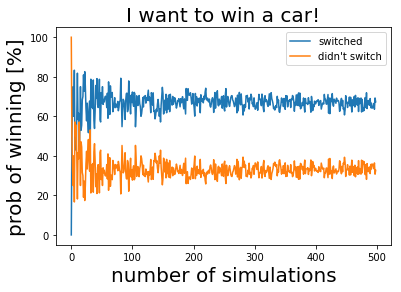

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(switching_res_ex, label ='switched')

plt.plot(not_switching_res_ex, label ='didn\'t switch')


plt.xlabel('number of simulations', fontsize=20)
plt.ylabel('prob of winning [%]', fontsize=20)


plt.title('I want to win a car!', fontsize = 20)

plt.legend(loc='upper right')

plt.show()


In [14]:
#
# We should always switch P(C=3|H=2)= 2/3 (0.6666666666)   and P(C=1|H=2) is only 1/3 (0.3333333333)
#